# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import scipy.stats as scp
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\595726\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
print(clean_hospital_read_df)

                                    Hospital Name  Provider Number State  \
16857                 THREE RIVERS MEDICAL CENTER           180128    KY   
14582        SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606           PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615          FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                      GREENE COUNTY HOSPITAL            10051    AL   
15625               FAIRVIEW DEVELOPMENTAL CENTER            50548    CA   
15642                  WAGONER COMMUNITY HOSPITAL           370166    OK   
15648           ST LUKE'S HOSPITAL AT THE VINTAGE           670075    TX   
15652               SOUTH TEXAS SURGICAL HOSPITAL           670061    TX   
15396              GEORGE L MEE MEMORIAL HOSPITAL            50189    CA   
14515                  JOHN H STROGER JR HOSPITAL           140124    IL   
15682                              ONECORE HEALTH           370220    OK   
14436       

C:\Users\595726\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


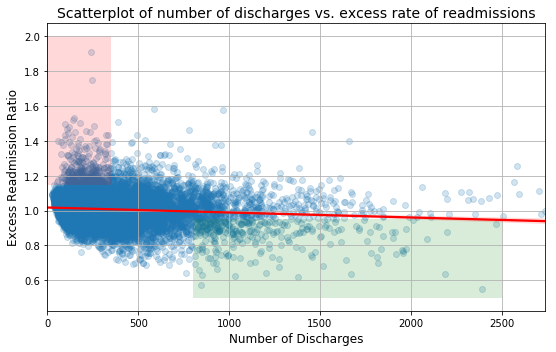

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

#81 seems to be the index where the 0 values end. the last 3 entries are x-value outliers, and would make the graph stretch 
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

x = clean_hospital_read_df['Number of Discharges'][81:-3]
y = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
sns.regplot(x, y, scatter = False, color = 'r')

ax.grid(True)

#results = sm.OLS(y, sm.add_constant(x)).fit()
#X_plot = np.linspace(0,1,100)
#ax.plot(X_plot, X_plot*results.params[0] + results.params[1])

fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Mean of excess readmission ratios: 0.9773
Mean number of discharges: 2236.090909090909

Claim: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

Provider Number               252180.113636
Number of Discharges              74.717172
Footnote                                NaN
Excess Readmission Ratio           1.022618
Predicted Readmission Rate        20.033923
Expected Readmission Rate         19.631987
Number of Readmissions            15.930135
dtype: float64
Percent with excess readmission rate greater than 1.00: 0.6321548821548821


Claim: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

Provider Number               251797.467391
Number of Discharges            1361.269565
Footnote                                NaN
Excess Readmission Ratio           0.979073
Predicted Readmission Rat

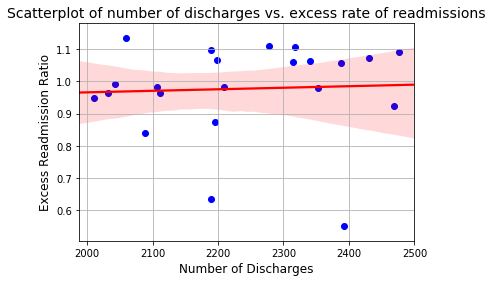

In [19]:
#My EDA
print('Mean of excess readmission ratios: '+ str(np.mean(y))) #mean of the rate of excess readmission
print('Mean number of discharges: ' + str(np.mean(x))) #mean of the number of discharges

print('\nClaim: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess \
readmission rate greater than 1\n')
#filtering on greater than 0 discharges, and less than 100 discharges, [1,99] interval, as the claim in part B. reflects
less_than_100_discharges = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Number of Discharges'] > 0)]
print(np.mean(less_than_100_discharges))
percent_over_ratio_of_one = less_than_100_discharges[less_than_100_discharges['Excess Readmission Ratio'] > 1]
print('Percent with excess readmission rate greater than 1.00: ' + str(len(percent_over_ratio_of_one)/len(less_than_100_discharges)))

print('\n\nClaim: In hospitals/facilities with number of discharges > 1000, mean excess readmission \
rate is 0.978 and 44% have excess readmission rate greater than 1\n')
#we are cutting off at 3000 because this removes the outliers. Notice in the code the range of values graphed is from [81:-3], thus omitting the last 
greater_than_1000_discharges = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 3000) & (clean_hospital_read_df['Number of Discharges'] > 1000)]
percent_over_excess_ratio = greater_than_1000_discharges[greater_than_1000_discharges['Excess Readmission Ratio'] > 1]

print(np.mean(greater_than_1000_discharges))
print('Percent with excess readmission rate greater than 1.00: ' + str(len(percent_over_excess_ratio)/len(greater_than_1000_discharges)))
print('Number of hospitals with over 1000 discharges per month: ' + str(len(greater_than_1000_discharges)))
print('Total number of hospitals with nonzero discharges: ' + str(clean_hospital_read_df.shape[0]))

between_2000_and_2500 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >= 2000) & (clean_hospital_read_df['Number of Discharges'] <= 2500)]
x =[a for a in between_2000_and_2500['Number of Discharges']]
y = list(between_2000_and_2500['Excess Readmission Ratio'])
plt.scatter(x, y, color = 'blue')

plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

x = between_2000_and_2500['Number of Discharges']
y = between_2000_and_2500['Excess Readmission Ratio']
sns.regplot(x, y, scatter = False, color = 'r')

plt.grid(True)
plt.show()


# A. Do you agree with the above analysis and recommendations? Why or why not?

I will go through each bullet point by point:

__A. Initial observations based on the plot above__

- __Claim: Overall, rate of readmissions is trending down with increasing number of discharges__

    __My Analysis:__ It was too close to call, so I went ahead and used Seaborn to generate a regression line and it is now very clearly barely trending at all. There is a lot of variation in the points, but the mean at each tick of the x-axis shows that the high and low points balance out to be within .05 of the 1.0 ratio. Overall, yes, the rate of readmissions is trending down, although barely doing so. Also, this is not really a fair statement because look at how 96% of the data is between the interval [0, 1000]. So comparing that 96% of the data to the 4% that is between the interval [1000, 2500] does not reflect statistical significance on the 4% side where there is not enough data. It may be very well the case that there a tiny fraction of hospitals have 1000+ discharges/month, and that claim is clearly reflected in the data.


- __Claim: With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)__

    __My Analysis:__ This appears to be obvious. The area shaded red on the graph is between [0,350], however, there are still points beyond x = 350 which are above y = 1.15. The most dense cluster of points above 1.15 Readmission Ratios is certainly on the lower end of the number of discharges.
    

- __Claim: With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)__

    __My Analysis:__ Now this one is not necessarily true. It is true that by looking at the graph one can clearly see that there are about 10 outliers with extremely low Readmission Ratio's, however, these are outliers. Furthermore, the density of the points between [0, 1000] represent a huge cluster of nearly 50% of the data between [0,1000] as being between a [0.8, 1.0] Readmission rate. Therefore, strictly speaking, because of the density of the data that seems like 99% of it lies between [0, 1000], one could say that there is a greater incidence of lower rates with lower number of discharges, simply because there are more data points. I noticed this immediately: the green and red zones are misleading and absolutely show bias against the conclusions being made such as the one above. The area shaded red should be extended across the entire graph's length and same with the area shaded green. Once the area shaded green starts from 0, it becomes more clear that there is a greater incidence of being in the green zone between [0,800] simply because of the density of data points in that area. Also, as a final point, look between the [2000, 2500] values on the graph. If this entire graph was a cut out of the [2000,2500] values, as done above, we see a positive line of regression, which tells a very different story than the claim made above. Our graph above between [2000, 2500] discharges shows that the Excess Readmission Ratio actually positively is correlated with the number of discharges as they increase. However, even with that point being made, there are about 20 data points between [2000, 2500] so that is not even statistically significant from a standpoint of CLT theorem.


__B. Statistics__

- __Claim: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1__

    __My analysis:__ My first line of EDA for this data set was to find the mean of the x and y set of data, or Number of Discharge and Excess Readmission Ratio columns, respectively. Looking at that information, we find out that the mean of the Number of Discharges is 364. I think that it would be a good idea to use 364 at the breaking point for our analysis. So I would find out what the mean readmission rate below and above 364 is, and what percentage have an excess readmission rate greater than 1 as well.
    

- __Claim: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1__

    __My analysis:__ The total number of hospitals/facilities with nonzero discharges is 11578. The number of hospitals/facilities with number of discharges > 1000 is only 460. That is 4% of the total population. Perhaps it would be better to look from a smaller discharge number that reflects upon more of the total number of hospitals. For example, if we are looking at hospitals with >5000 discharges a month, we are talking about 1 hospital, and that is useless for any analysis purposes. 460 hospitals is certainly a large enough sample size, in terms of CLT >30 sample size, but it is also only 4% of the population so it is not so representative of the population on the whole. All that being said, this claim made above is entirely accurate and shows how few hospitals there are with over 1000 discharges per month.
    

__C. Conclusions__

- __Claim: There is a significant correlation between hospital capacity (number of discarges and readmission rates.__

    __My analysis:__The correlation does not look significant at all. This data tends to be equal to or around 1 because it is a ratio of expected vs predicted readmissions to the hospital. That being said, especially between [0, 1000], there is low correlation as it seems like a blob of splattered data points. There is definitely some level of correlation because these types of ratios tend to be centered around 1.0. 
    
    
- __Claim: Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.__

    __My analysis:__This may be true in some cases such as in poorer areas of the country, but probably not as a generality for every small hospital/facility. I would imagine that smaller hospitals/facilities discharge patients sooner because of limited space, and pending emergencies to take care of, thus leaving unfinished business with the previous patient, while admitting a new one. The lack of space to keep people in may result in early discharge due to pressuring emergencies and situations. Early discharge would lead to readmission of the same patients who did not recover fully.
    

__D. Regulatory policy recommendations__

- __Claim: Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.__

	__My analysis:__Without any supporting argument, the number 300 is thrown out as being defined to be the cut off for small capacity hospitals. That is fine, though, the mean capacity of hospitals as we found above is 364. So it could just be that most hospitals are small, which the graph certainly suggests as 96% of the data is below 1000 capacity. We can see the most dense cluster of "Red zone Excess Readmission Ratio" points in the [0, 350] range very clearly. It is not wrong to claim that hospitals with lower capacity tend to have a higher incidence in the Excess Readmission Ratio "red zone". However it is not necessarily correct to assume that their resource allocation for quality care is poor simply based on this data. 


- __Claim: Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.__

	__My analysis:__This claim is assuming that if all hospitals had more rooms and employees then the rate of excess readmissions would be reduced across the board, which is a baseless assumption in this case. Consolidating hospitals and facilities to one location, from two locations, will cause issues for people around the area. It will cause longer travel times for many patients, and possibly longer wait times to get into the hospital/facility. I am not sure what would be accomplished by consolidating two large hospitals with already high capacity into one. More importantly, there is no explicit evidence for the reduction of readmission rates through higher capacity and number of discharges. Higher capacity means bigger facility, more rooms. Higher discharge means more staff providing medical solutions. This claim is assuming that high capacity and discharge empirically correlates to a lower readmission rate and that is not reflected in the data.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1) Setup an appropriate hypothesis test. 

2) Compute and report the observed significance value (or p-value).

3) Report statistical significance for  α  = .01.

4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

5) Look at the scatterplot above.
  - What are the advantages and disadvantages of using this plot to convey information?
  - Construct another plot that conveys the same information in a more direct manner.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
H_0: The pearson correlation coefficient is not significantly different from 0, thus there is not a significant linear relationship between x and y in the population.
H_a: The pearson correlation coefficient is significantly different from 0, thus there is a significant linear relationship between x and y in the population.

In [6]:
pearson_corr = scp.pearsonr(x,y)
print(pearson_corr)
#this outputs the correlation coefficient, r as well as the p value for a two-tailed test

(0.047666893900522832, 0.83316344288060273)


As we can see above, the p-value of 1.50 x 10^-23, which is much less than α = .01, indicates that the observed pearson coefficient of r = -0.093 is extremely accurate to the true correlation of the population. This shows on a scale of 0 to -1 a -9.3% correlation between the number of discharges and the rate of readmissions. With a low ratio of not even 10% correlation, the data is not correlated enough to draw statistical inference from. This correlation is not even close to use the linear regression line for predicting future values. Therefore, the whole notion that higher discharge/capacity leads to lower readmission rates is very weakly supported by this evidence. And under this logical pretense, the second conclusion that consolidating hospitals/facilities would leader to lower readmission rates is not a good recommendation based on this data. 

I would say that the reason that the hospitals with higher discharge/capacity might see lower readmission rates is because these hospitals/facilities have more rooms, funding, and thus better doctors because of the upper class status of their facility. And the upper class status of those hospitals with greater than 1000 number of discharges/capacity is, as calculated before, only 4% of all the hospitals/facilities in the given data. Those top 4% hospitals/facilities are much larger than most, and larger facilities/hospitals tends to imply wealthier and more upscale. This could further imply advanced resources of these top 4% hospitals over the other 96%. But even that is not entirely true across the board, there are 205/460 hospitals with over 1000 capacity/number of discharge and greater than 1.0 Excess Readmission Ratio. That is 44.5% of the larger 4% hospitals/facilities that have a readmission rate of greater than 1.0. Therefore, having larger facilities/hospitals does not necessarily mean they will have lower readmission rates, based on the observations above and the dataset provided. 

My recommendation to the client would be to invest in better doctors and greater resources for their hospitals/facilities before they insist on consolidating hospitals/facilities and causing unknown factors to reveal themselves that might make that a worse situation than before. Also, my general recommendation before looking at any of the data to any hospital would be to make sure their patients know what they're supposed to do when they go home. Reduce the number of readmissions due to patient ignorance, make sure to fully inform them and ensure that they understand what they need to do before they are discharged.

In [7]:
greater_than_1000_discharges_excess = greater_than_1000_discharges[greater_than_1000_discharges['Excess Readmission Ratio'] > 1.0]
print(len(greater_than_1000_discharges_excess))


205


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Advantages:

1) it displays the density of the data with solid color because of the alpha = 0.2

2) it shows the distribution of the data

3) you can detect correlation via scatter plot

Disadvantages:

1) the color zones are inappropriate/biased.

2) many of the points are drowned out by others because of overlap so much, even with transparency. 

3) going back to point 1) in advantages, when there's a solid color, you can't tell how many points are in that "glob" of data. 

4) there is not a clear trend that you can see in the data because the data has tons of variance.

# My rendition of the plot

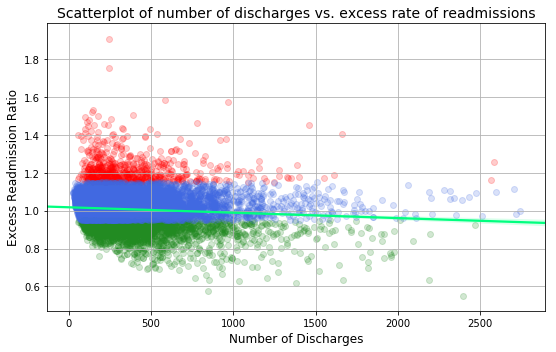

In [8]:
clean_hospital_read_df = clean_hospital_read_df[81:-3]
excess_over_1_15 = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] >= 1.15]
x = [a for a in excess_over_1_15['Number of Discharges']]
y = list(excess_over_1_15['Excess Readmission Ratio'])


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2, color = 'r')

excess_under_9_5 = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] <= .95]
x = [a for a in excess_under_9_5['Number of Discharges']]
y = list(excess_under_9_5['Excess Readmission Ratio'])
ax.scatter(x, y,alpha=0.2, color = 'forestgreen')

between_9_5_and_1_15 = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'] > .95) & (clean_hospital_read_df['Excess Readmission Ratio'] < 1.15)]
x = [a for a in between_9_5_and_1_15['Number of Discharges']]
y = list(between_9_5_and_1_15['Excess Readmission Ratio'])
ax.scatter(x, y,alpha=0.2, color = 'royalblue')

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

x = clean_hospital_read_df['Number of Discharges']
y = clean_hospital_read_df['Excess Readmission Ratio']
sns.regplot(x, y, scatter = False, color = 'springgreen')

ax.grid(True)

fig.tight_layout()

My reasoning for the plot above:

This is my version of the original scatter plot shown above. Instead of having red and green boxes, have all points exceeding 1.15 shown in red, and all points below .95 shown in green. I think this is a much nicer illustrative example. 

Also, the regression line really helps to have on the plot because it is extremely hard to tell otherwise whether there is any sort of trend or not. 

Some people may not like this rendition because there are colors, and it is still a scatter plot with over 11500 data points, so much of it is a solid cluster of points that you cannot discern the true density of by eye examination.

(-0.021222171948945975, 0.64984494867154008)


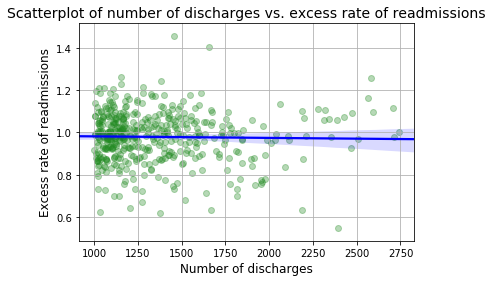

In [23]:
#pull out the 460 points above 1000 and do a regression line
x = [a for a in greater_than_1000_discharges['Number of Discharges']]
y = list(greater_than_1000_discharges['Excess Readmission Ratio'])
plt.scatter(x, y,alpha = 0.33, color = 'forestgreen')

x = greater_than_1000_discharges['Number of Discharges']
y = greater_than_1000_discharges['Excess Readmission Ratio']
sns.regplot(x, y, scatter = False, color = 'b')

plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
pearson_r = scp.pearsonr(x,y)
print(pearson_r)
plt.grid(True)
plt.show()

Looking at the graph above, there is barely any statistically significant regression for greater than 1000 discharge. Converting the pearson R value to percentage correlation out of 100, it is 2.1% correlated, which is extremely low. Because we found the correlation of the all 11500 points to be -9.3%, and the value for these 460 points above 1000 discharges are only -2.1% correlated, then that shows that most of the correlation happened in the [0,1000] range of the data. And that detracts even further from the statement that higher discharge/capacity results in lower readmission rates.

C:\Users\595726\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\595726\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


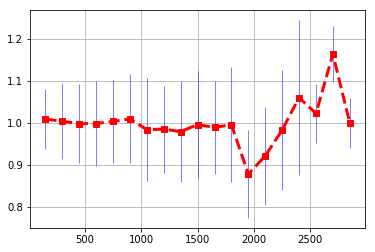

In [40]:
#20 evenly sized bins from least to most discharges, take averages (or median) of their rate along percentiles and plot

bin150 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >= 0) & (clean_hospital_read_df['Number of Discharges'] <= 150)]
bin300 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 150) & (clean_hospital_read_df['Number of Discharges'] <= 300)]
bin450 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 300) & (clean_hospital_read_df['Number of Discharges'] <= 450)]
bin600 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 450) & (clean_hospital_read_df['Number of Discharges'] <= 600)]
bin750 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 600) & (clean_hospital_read_df['Number of Discharges'] <= 750)]
bin900 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 750) & (clean_hospital_read_df['Number of Discharges'] <= 900)]
bin1050 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 900) & (clean_hospital_read_df['Number of Discharges'] <= 1050)]
bin1200 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1050) & (clean_hospital_read_df['Number of Discharges'] <= 1200)]
bin1350 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >1200) & (clean_hospital_read_df['Number of Discharges'] <= 1350)]
bin1500 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1350) & (clean_hospital_read_df['Number of Discharges'] <= 1500)]
bin1650 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1500) & (clean_hospital_read_df['Number of Discharges'] <= 1650)]
bin1800 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1650) & (clean_hospital_read_df['Number of Discharges'] <= 1800)]
bin1950 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1800) & (clean_hospital_read_df['Number of Discharges'] <= 1950)]
bin2100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1950) & (clean_hospital_read_df['Number of Discharges'] <= 2100)]
bin2250 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 2100) & (clean_hospital_read_df['Number of Discharges'] <= 2250)]
bin2400 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 2250) & (clean_hospital_read_df['Number of Discharges'] <= 2400)]
bin2550 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 2400) & (clean_hospital_read_df['Number of Discharges'] <= 2550)]
bin2700 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 2550) & (clean_hospital_read_df['Number of Discharges'] <= 2700)]
bin2850 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 2700) & (clean_hospital_read_df['Number of Discharges'] <= 2850)]
bin3000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 2850) & (clean_hospital_read_df['Number of Discharges'] <= 3000)]


bin_discharges = [bin150['Number of Discharges'].values, bin300['Number of Discharges'].values, bin450['Number of Discharges'].values, 
                 bin600['Number of Discharges'].values, bin750['Number of Discharges'].values, bin900['Number of Discharges'].values, 
                 bin1050['Number of Discharges'].values, bin1200['Number of Discharges'].values, bin1350['Number of Discharges'].values, 
                 bin1500['Number of Discharges'].values, bin1650['Number of Discharges'].values, bin1800['Number of Discharges'].values, 
                 bin1950['Number of Discharges'].values, bin2100['Number of Discharges'].values, bin2250['Number of Discharges'].values, 
                 bin2400['Number of Discharges'].values, bin2550['Number of Discharges'].values, bin2700['Number of Discharges'].values, 
                 bin2850['Number of Discharges'].values, bin3000['Number of Discharges'].values]
bin_rates = [bin150['Excess Readmission Ratio'].values, bin300['Excess Readmission Ratio'].values, bin450['Excess Readmission Ratio'].values, 
            bin600['Excess Readmission Ratio'].values, bin750['Excess Readmission Ratio'].values, bin900['Excess Readmission Ratio'].values, 
            bin1050['Excess Readmission Ratio'].values, bin1200['Excess Readmission Ratio'].values, bin1350['Excess Readmission Ratio'].values, 
            bin1500['Excess Readmission Ratio'].values, bin1650['Excess Readmission Ratio'].values, bin1800['Excess Readmission Ratio'].values, 
            bin1950['Excess Readmission Ratio'].values, bin2100['Excess Readmission Ratio'].values, bin2250['Excess Readmission Ratio'].values, 
            bin2400['Excess Readmission Ratio'].values, bin2550['Excess Readmission Ratio'].values, bin2700['Excess Readmission Ratio'].values, 
            bin2850['Excess Readmission Ratio'].values, bin3000['Excess Readmission Ratio'].values]
bin_medians = [np.median(bin150['Excess Readmission Ratio']), np.median(bin300['Excess Readmission Ratio']), np.median(bin450['Excess Readmission Ratio']), 
               np.median(bin600['Excess Readmission Ratio']), np.median(bin750['Excess Readmission Ratio']),
              np.median(bin900['Excess Readmission Ratio']), np.median(bin1050['Excess Readmission Ratio']), 
               np.median(bin1200['Excess Readmission Ratio']), np.median(bin1350['Excess Readmission Ratio']), 
               np.median(bin1500['Excess Readmission Ratio']),
              np.median(bin1650['Excess Readmission Ratio']), np.median(bin1800['Excess Readmission Ratio']),
               np.median(bin1950['Excess Readmission Ratio']), np.median(bin2100['Excess Readmission Ratio']), 
               np.median(bin2250['Excess Readmission Ratio']), 
              np.median(bin2400['Excess Readmission Ratio']), np.median(bin2550['Excess Readmission Ratio']), 
               np.median(bin2700['Excess Readmission Ratio']), np.median(bin2850['Excess Readmission Ratio']), np.median(bin3000['Excess Readmission Ratio'])]
bin_std = [np.std(bin150['Excess Readmission Ratio']), np.std(bin300['Excess Readmission Ratio']), np.std(bin450['Excess Readmission Ratio']), 
               np.std(bin600['Excess Readmission Ratio']), np.std(bin750['Excess Readmission Ratio']),
              np.std(bin900['Excess Readmission Ratio']), np.std(bin1050['Excess Readmission Ratio']), 
               np.std(bin1200['Excess Readmission Ratio']), np.std(bin1350['Excess Readmission Ratio']), 
               np.std(bin1500['Excess Readmission Ratio']),
              np.std(bin1650['Excess Readmission Ratio']), np.std(bin1800['Excess Readmission Ratio']),
               np.std(bin1950['Excess Readmission Ratio']), np.std(bin2100['Excess Readmission Ratio']), 
               np.std(bin2250['Excess Readmission Ratio']), 
              np.std(bin2400['Excess Readmission Ratio']), np.std(bin2550['Excess Readmission Ratio']), 
               np.std(bin2700['Excess Readmission Ratio']), np.std(bin2850['Excess Readmission Ratio']), np.std(bin3000['Excess Readmission Ratio'])]
bin_names = ['bin150', 'bin300', 'bin450', 'bin600', 'bin750', 'bin900', 'bin1050', 'bin1200', 'bin1350',
             ' bin1500', 'bin1650', 'bin1800', 'bin1950', 'bin2100', 'bin2250', 'bin2400', 'bin2550',
             'bin2700', 'bin2850', 'bin3000']
bin_data = {'bin name': bin_names, 'bin medians': bin_medians, 'bin discharges':bin_discharges, 'bin_rates':bin_rates
               }
df = pd.DataFrame.from_dict(bin_data)

X = [150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000]
Y = bin_medians
plt.errorbar(X, Y, yerr =bin_std, fmt = "rs--", linewidth=3, elinewidth=0.5, ecolor='b', capthick=0.5)
plt.grid(True)
plt.show()


#can try to take 10%, 20%, 30% Percentiles mean and plot against each, see if there are any trends

In the graph above, we see the median values of the Excess Readmission Ratios and the variance associated with them. There is a downward trend until about 2000, then it seems to shoot up past that point. This is in line with the positive correlation we saw in the graph near the beginning showing the regression line for the [2000, 2500] discharge points. Looking at this graph once again does not support the interpretation that higher capacity/discharge means lower readmission ratio, with the exception of the 1950 bin. 

# More ideas to follow up on

In [ ]:
#we can also make this into a classification problem as follows
#if readmission ratio is above 1.0, then assign value 1. If readmission ratio is equal to or below 1.0, then assign value 0.
ratio_above_1 = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] > 1.0]
ratio_below_1 = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] <= 1.0]

#we want to test the claim that higher capacity and discharge numbers result in lower readmission ratios
#H0:
#Ha:

#How do I want to set up the hypothesis?
#Do I do a 2 sample proportion z-test on ratio of high capacity (>1000) 
#and low ratio < 1.00 + ratio of high capacity + high ratio?
#That only encompasses 460 data points, out of about 11500.


